<a href="https://colab.research.google.com/github/rafaelrlima/smarkio_test_data_science/blob/main/smarkio_analise_nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Teste Ciência de Dados Smarkio - Análise NLP

Esse projeto foi publicado em: https://github.com/rafaelrlima/smarkio_test_data_science

Teste realizado por: Rafael Ribeiro de Lima

Status: Em execução

Etapas executadas nesse arquivo
5. Crie um classificador, a partir da segunda aba - NLP do arquivo de dados, que
permita identificar qual trecho de música corresponde às respectivas artistas listadas
(Sugestão: Naive Bayes Classifier).

## Imports

In [1]:
import pandas as pd #manipulação de dataset
import numpy as np
from sklearn.preprocessing import LabelEncoder #pré-processamento
from sklearn.preprocessing import MinMaxScaler #padronização
from sklearn.neighbors import KNeighborsClassifier #classificador
from sklearn.model_selection import train_test_split #separando em dados teste e treinamento 
from sklearn.metrics import classification_report # metricas de validação
from sklearn.metrics import accuracy_score #acuracia
from sklearn.metrics import precision_score #precision
from sklearn.metrics import recall_score #recall
from sklearn.metrics import f1_score #f1-score
from sklearn.metrics import roc_auc_score #area sob curva roc
from sklearn.metrics import roc_curve #curva roc
from sklearn.metrics import confusion_matrix #matriz de confusão
from matplotlib import pyplot #grafico
import seaborn as sns

## Carregando os Dataframe

In [2]:
column_names = ["letra", "artista"]

xls = '/content/drive/MyDrive/Colab Notebooks/teste_smarkio_lbs.xls'

data = pd.read_excel(xls, sheet_name='NLP',usecols=column_names)

## Explorando os dados

In [3]:
print(data)

                                                 letra  artista
0    Jay-z Uh-uh-uh You ready b? Let's go get 'em. ...  Beyoncé
1    Your challengers are a young group from Housto...  Beyoncé
2    Dum-da-de-da Do, do, do, do, do, do (Coming do...  Beyoncé
3    If I ain't got nothing I got you If I ain't go...  Beyoncé
4    Six inch heels She walked in the club like nob...  Beyoncé
..                                                 ...      ...
513  Yeah yeah Yeah yeah  I ain't trying to think a...  Rihanna
514  You the one that I dream about all day You the...  Rihanna
515  No, no, no You don't love me and I know now No...  Rihanna
516  You should be mine Oh baby, oh baby, oh baby, ...  Rihanna
517  [Rihanna] I remember when the world was just m...  Rihanna

[518 rows x 2 columns]


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   letra    518 non-null    object
 1   artista  518 non-null    object
dtypes: object(2)
memory usage: 8.2+ KB


In [5]:
#agrupar os artistas e quantos registros correspondem a cada
data.groupby(by='artista').size()

artista
Beyoncé    274
Rihanna    244
dtype: int64

In [6]:
df2 = pd.DataFrame(data)

In [7]:
df2 = df2.apply(lambda x: x.astype(str).str.lower())

In [8]:
df2["letra"] = df2['letra'].str.replace(r'[^\w\s]','')


In [9]:
df2["artista"] = df2['artista'].str.replace(r'[é]','e')

In [10]:
df2.head()

,letra,artista
0,jayz uhuhuh you ready b lets go get em look f...,beyonce
1,your challengers are a young group from housto...,beyonce
2,dumdadeda do do do do do do coming down drippi...,beyonce
3,if i aint got nothing i got you if i aint got ...,beyonce
4,six inch heels she walked in the club like nob...,beyonce


## Dividindo os Dados

In [11]:
cantoras = [
    'beyonce', 'rihanna'
]

In [12]:
MUSIC_LEN = 400 # each song has to be > 100 characters
N = 300 # number of records to pull from each cantora
RANDOM_SEED = 10 # random seed to make results repeatable

#Separando em treino e teste


from sklearn.utils import shuffle
from nltk.corpus import stopwords

train_df = pd.DataFrame()
test_df = pd.DataFrame()

for letra in cantoras: # loop over each genre
    subset = df2[ # create a subset 
        (df2.letra.str.len() > MUSIC_LEN)
    ]
    train_set = subset.sample(n=N, random_state=RANDOM_SEED)
    test_set = subset.drop(train_set.index)
    train_df = train_df.append(train_set) # append subsets to the master sets
    test_df = test_df.append(test_set)


train_df = shuffle(train_df)
test_df = shuffle(test_df)

In [13]:
 #train_df, test_df  = train_test_split(df2, test_size = 0.25,random_state = 1) #teste de divisão dataframe

In [14]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 408 entries, 375 to 146
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   letra    408 non-null    object
 1   artista  408 non-null    object
dtypes: object(2)
memory usage: 9.6+ KB


In [15]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# define our model
text_clf = Pipeline(
    [('vect', CountVectorizer()),
     ('clf', MultinomialNB(alpha=0.1))])

## Treinando o Modelo

In [16]:
# train our model on training data
text_clf.fit(train_df.letra, train_df.artista)  

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True))],
         verbose=False)

In [17]:
# score our model on testing data
predicted = text_clf.predict(test_df.letra)
np.mean(predicted == test_df.artista)

0.7352941176470589

Matriz de Confusão

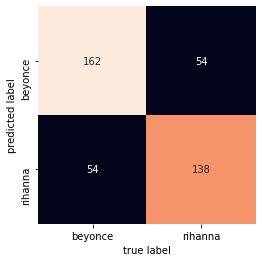

In [18]:

mat = confusion_matrix(test_df.artista, predicted)
sns.heatmap(
    mat.T, square=True, annot=True, fmt='d', cbar=False,
    xticklabels=cantoras, 
    yticklabels=cantoras
)
pyplot.xlabel('true label')
pyplot.ylabel('predicted label');

## Conclusão

Fiz dois teste: <br> 
Primeiro método dividindo o dataframe em 25 teste e 75 treino e o Segundo médoto quebrando as músicas e consequentemente aumentando os dataframes de teste e treino. <br>
O primeiro método cheguei uma predição de 0,70 contra 0,73 do segundo método